In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import file from the system to cobal
#from google.colab import files
#uploaded =files.upload()
df=pd.read_excel('/content/samplebankloandata.xlsx')
print(df.head())



print(df.head())
print(df.tail)
print(df.isnull().sum())       #count null values



        id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   
1  1077430  2011 2011-01-12  1042013             0.5           RENT   
2  1077175  2011 2011-01-12  1062014            10.0           RENT   
3  1076863  2011 2011-01-12  1012015            10.0           RENT   
4  1075358  2011 2011-01-12  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414  

In [ ]:
print(df.describe())

                 id          year                        issue_d  \
count  9.590200e+04  95902.000000                          95902   
mean   1.147685e+06   2011.215606  2011-03-27 01:18:42.621008896   
min    5.473400e+04   2007.000000            2007-01-06 00:00:00   
25%    6.907415e+05   2011.000000            2011-01-03 00:00:00   
50%    1.150927e+06   2012.000000            2012-01-03 00:00:00   
75%    1.486514e+06   2012.000000            2012-01-09 00:00:00   
max    2.844673e+06   2012.000000            2012-01-12 00:00:00   
std    5.318572e+05      1.089114                            NaN   

            final_d  emp_length_int  home_ownership_cat    annual_inc  \
count  9.590200e+04    95902.000000        95902.000000  9.590200e+04   
mean   1.066972e+06        5.460427            2.001147  6.946160e+04   
min    1.012008e+06        0.500000            1.000000  1.896000e+03   
25%    1.032015e+06        2.000000            1.000000  4.200000e+04   
50%    1.072012e+06   

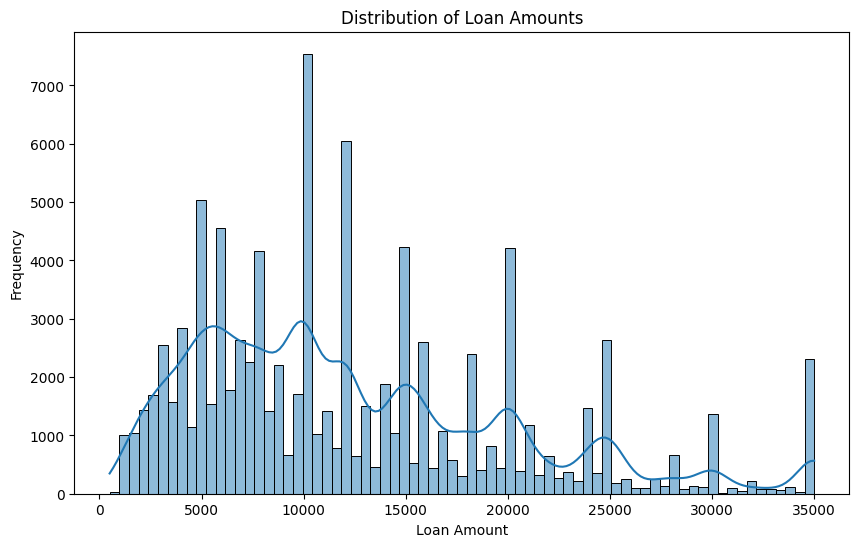

In [ ]:
# Histogram: Distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amount', kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

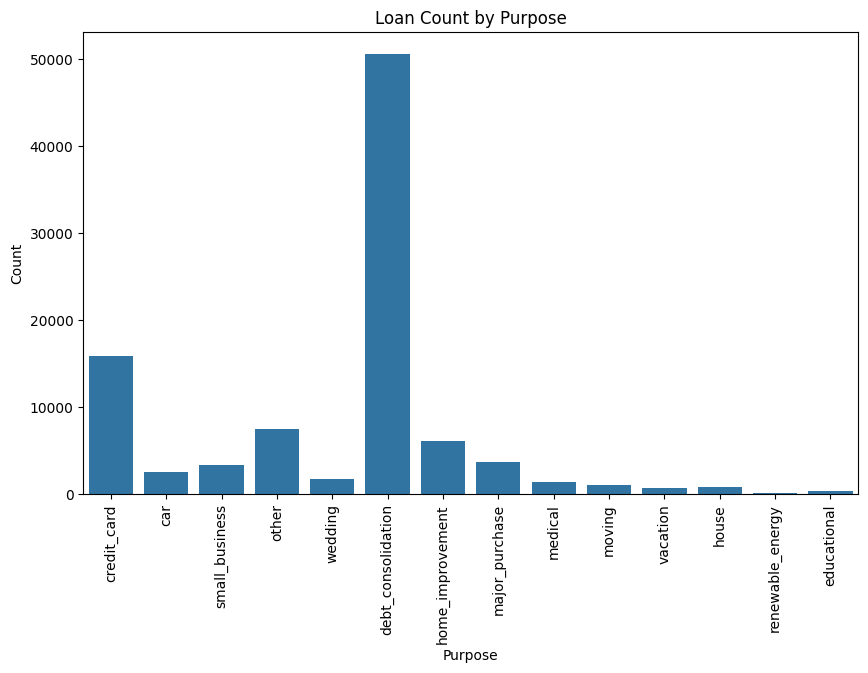

In [ ]:
#loan count by purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purpose')
plt.xticks(rotation=90)
plt.title('Loan Count by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

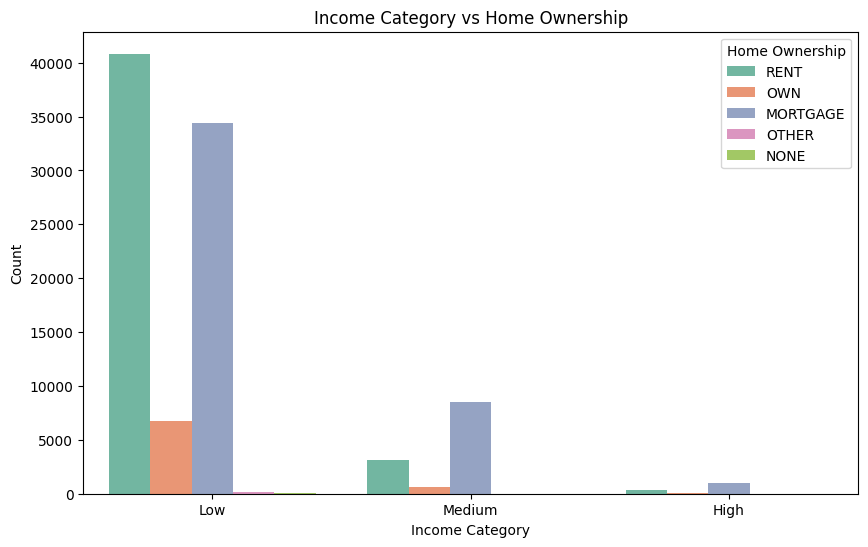

In [ ]:
#Grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_category', hue='home_ownership', palette='Set2', dodge=True)
plt.title('Income Category vs Home Ownership')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Home Ownership')
plt.show()


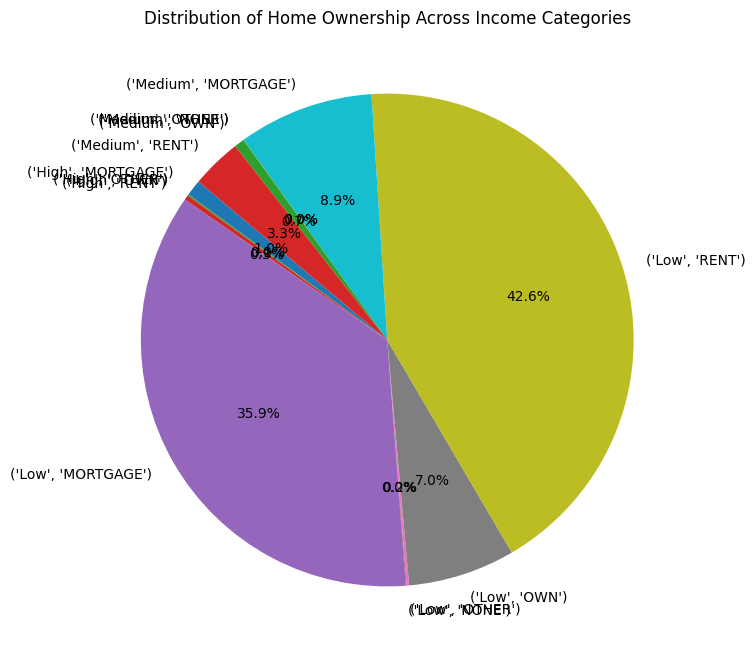

In [ ]:
# Pie chart
# Distribution of home ownership across income categories
plt.figure(figsize=(8, 8))
income_home_ownership_counts = df.groupby(['income_category', 'home_ownership']).size()
plt.pie(income_home_ownership_counts, labels=income_home_ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Home Ownership Across Income Categories')
plt.show()


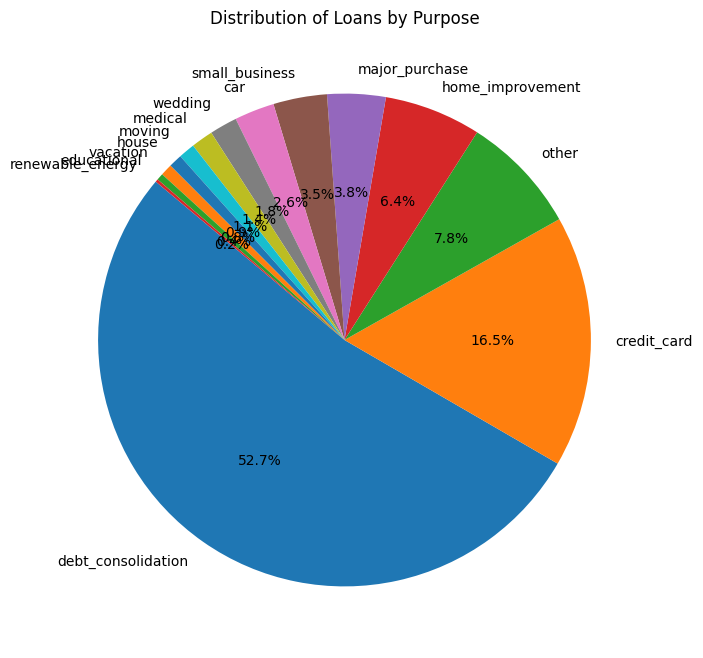

In [ ]:
# Pie chart
#Distribution of loans by purpose
purpose_counts = df['purpose'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loans by Purpose')
plt.show()


<ipython-input-4-3c139f301232>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='income_category', y='home_ownership', palette='Set2')


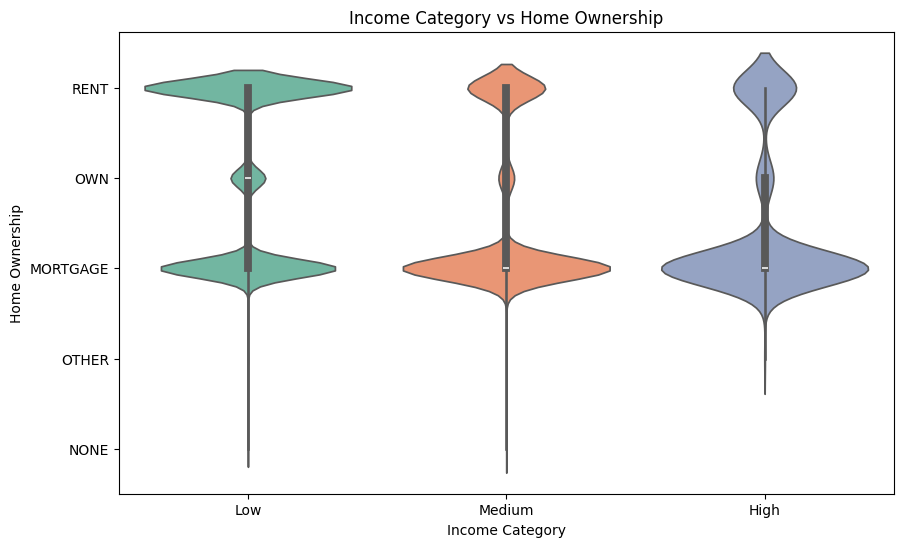

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='income_category', y='home_ownership', palette='Set2')
plt.title('Income Category vs Home Ownership')
plt.xlabel('Income Category')
plt.ylabel('Home Ownership')
plt.show()


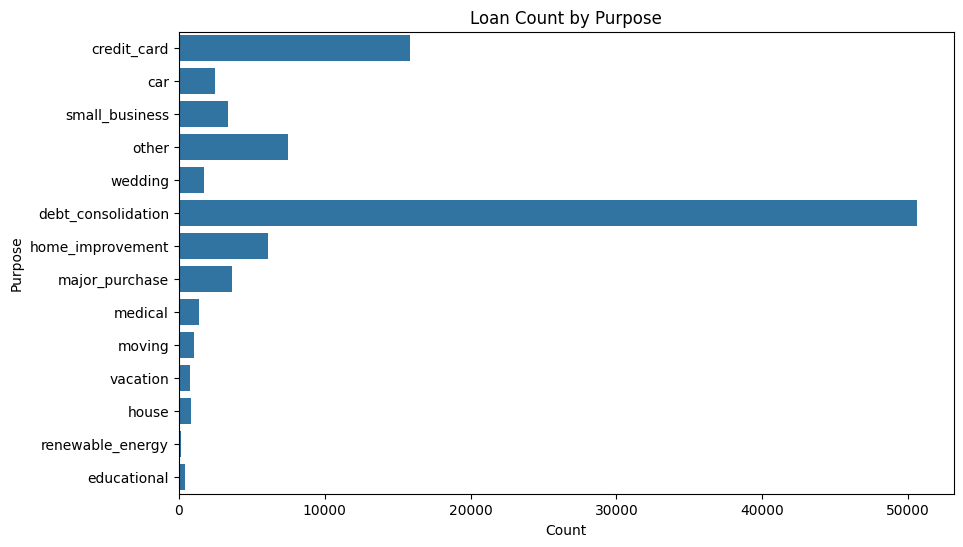

In [ ]:
# Bar plot: Loan count by purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='purpose')
plt.title('Loan Count by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()


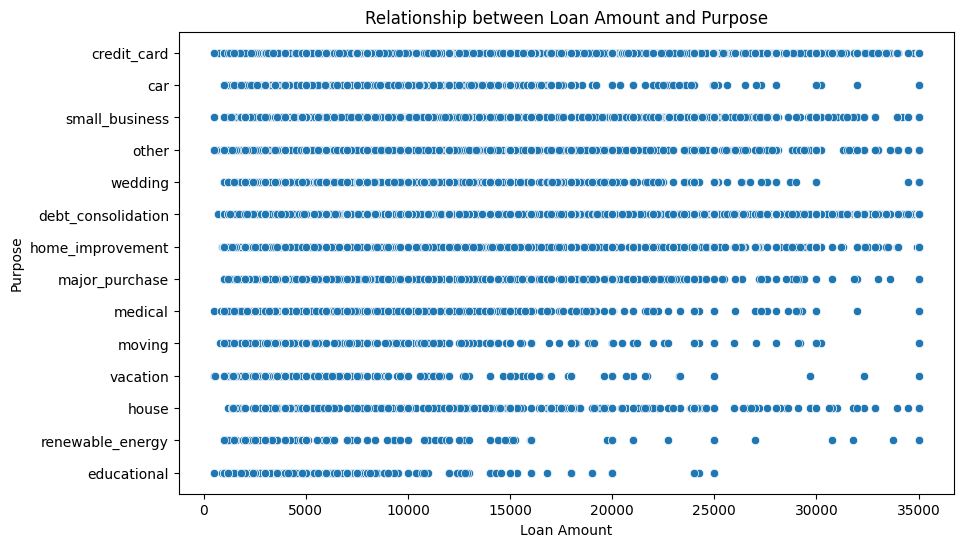

In [ ]:
# Scatter plot: Relationship between loan amount and purpose
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amount', y='purpose')
plt.title('Relationship between Loan Amount and Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Purpose')
plt.show()


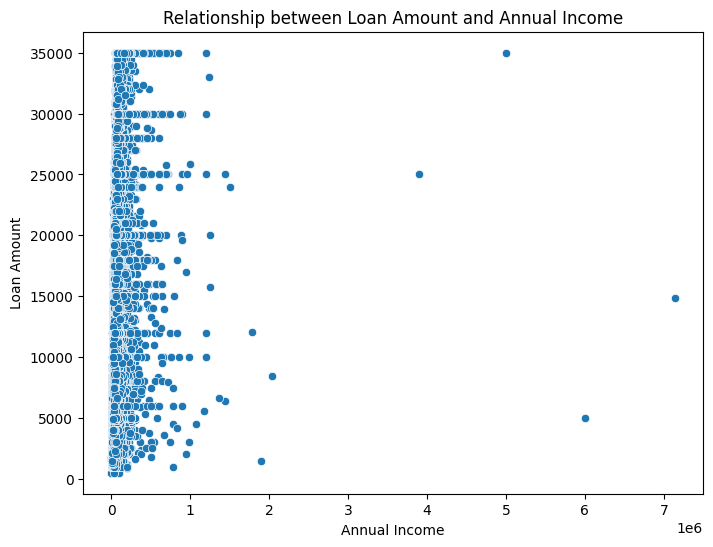

In [ ]:
# Scatter plot: Relationship between loan amount and annual income # avoid scatter plot for the category variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_inc', y='loan_amount')
plt.title('Relationship between Loan Amount and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


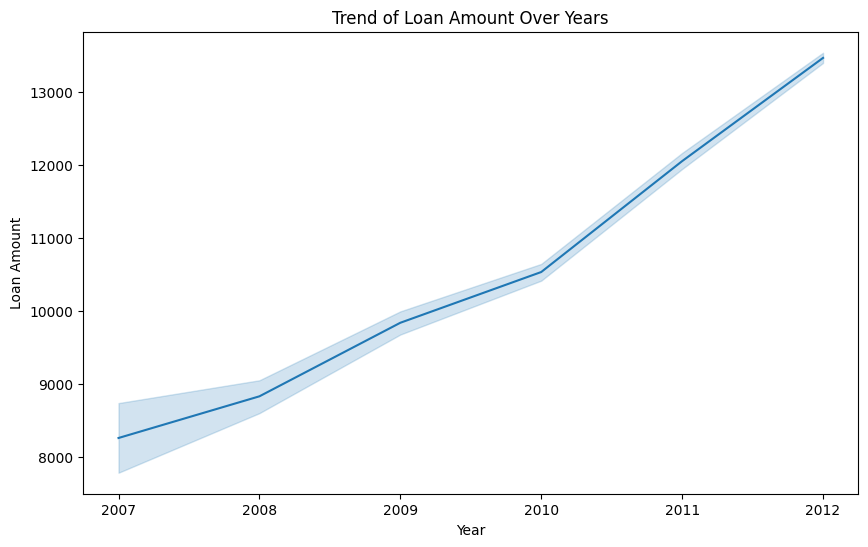

In [ ]:
# Line chart: Trend of loan amount over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='loan_amount')
plt.title('Trend of Loan Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.show()


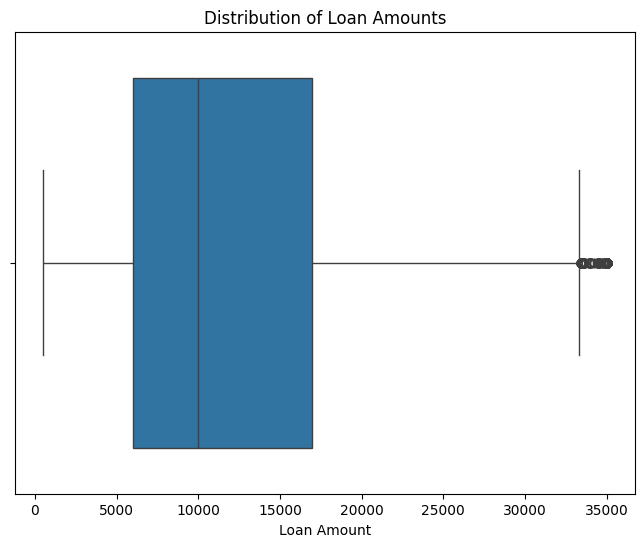

In [ ]:
#Boxplot
#Distribution of loan amounts
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_amount')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()


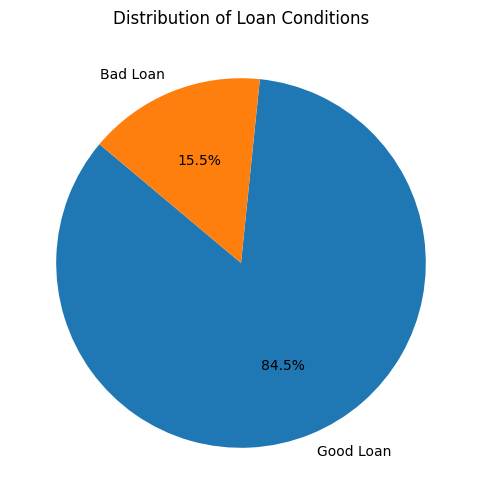

In [ ]:
# Pie chart: Distribution of loan conditions
loan_condition_counts = df['loan_condition'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(loan_condition_counts, labels=loan_condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Conditions')
plt.show()


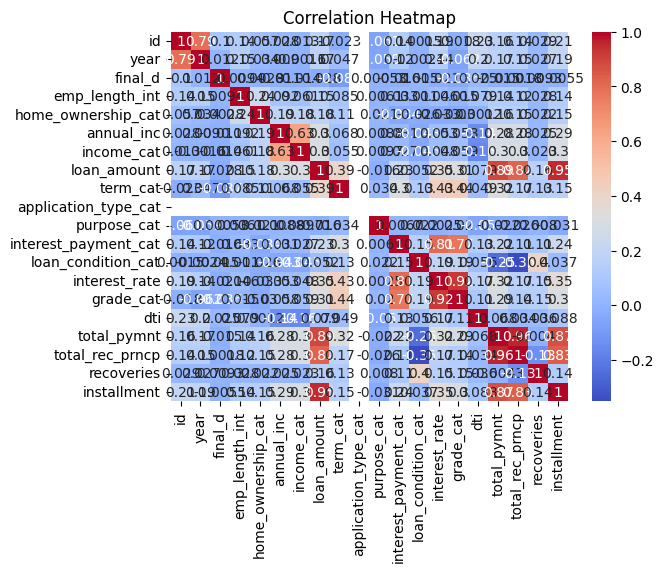

In [ ]:
# Correlation heat map
corr=df.select_dtypes(include=['int', 'float']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#plot graph
import pandas as pd
import plotly.express
fig = px.scatter_3d(df, x='loan_amount', y='interest_rate', z='annual_inc',
                    color='purpose', opacity=0.7,
                    size_max=10, hover_name='id')

fig.update_layout(scene=dict(
                    xaxis_title='Loan Amount',
                    yaxis_title='Interest Rate',
                    zaxis_title='Annual Income'))
fig.show()
